In [58]:
import pandas as pd
from pandas import json_normalize
import requests 
import json
import os
from dotenv import load_dotenv #conda install -c conda-forge python-dotenv
import time
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../")

In [55]:
#url = "https://api.spacexdata.com/v4/starlink"
#url = "https://api.wheretheiss.at/v1/satellites/25544"
url = "http://api.open-notify.org/iss-now.json"

In [56]:
req = requests.get(url)
req.content

b'{"iss_position": {"latitude": "-50.3607", "longitude": "26.4085"}, "message": "success", "timestamp": 1682863847}'

In [57]:
req.json()

{'iss_position': {'latitude': '-50.3607', 'longitude': '26.4085'},
 'message': 'success',
 'timestamp': 1682863847}

data_list = []

while True:
    req2 = requests.get(url2)
    data = req2.json()
    
    if data['message'] == 'success':
        data_list.append(data)
        time.sleep(1)
    else:
        break 
    
data_list

In [19]:
df = pd.read_csv("Falcon_9_and_Falcon_Heavy_launches.csv")
df.columns
df = df[['Date', 'Time', 'Version, Booster', 'Launch_Site', 'Payload', 
        'Payload_Mass', 'Orbit', 'Customer', 'Launch_Outcome', 'Booster_landing']]
df


,Date,Time,"Version, Booster",Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_landing
0,4 June 2010,18:45,F9 v1.0 B0003,CCAFS SLC-40,Dragon Spacecraft Qualification Unit,No payload (excl. Dragon Mass),LEO,SpaceX,Success,Failure
1,8 December 2010,15:43,F9 v1.0 B0004,CCAFS SLC-40,Dragon demo flight C1,Classified (excl. Dragon Mass),LEO (ISS),NASA (COTS) NRO,Success,Failure
2,22 May 2012,07:44,F9 v1.0 B0005,CCAFS SLC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,8 October 2012,00:35,F9 v1.0 B0006,CCAFS SLC-40,SpaceX CRS-1,"4,700",LEO (ISS),NASA (CRS),Success,No attempt
4,8 October 2012,00:35,F9 v1.0 B0006,CCAFS SLC-40,Orbcomm-OG2,172,LEO,Orbcomm,Partial failure,No attempt
...,...,...,...,...,...,...,...,...,...,...
160,19 June 2022,04:27,F9 B5 B1061.9,CCSFS SLC-40,Globalstar-2 M087 (FM15),700,LEO,GlobalstarUnknown US Government Agency,Success,Success(drone ship)
161,29 June 2022,21:04,F9 B5 B1073.2,CCSFS SLC-40,SES-22,"3,500",GTO,SES,Success,Success(drone ship)
162,7 July 2022,13:11,F9 B5 B1058.13,CCSFS SLC-40,Starlink Group 4-21 (53 satellites),"16,250",LEO,SpaceX,Success,Success(drone ship)
163,11 July 2022,01:39,F9 B5 B1063.6,VSFB SLC-4E,Starlink Group 3-1 (46 satellites),"13,570",SSO,SpaceX,Success,Success(drone ship)


In [86]:
f9_filter = df['Version, Booster'].str.contains('F9 B5')
df_f9b5 = df[f9_filter]
df_f9b5

,Date,Time,"Version, Booster",Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_landing
54,11 May 2018,20:14,F9 B5 B1046.1,KSC LC-39A,Bangabandhu-1,"3,600",GTO,Thales-Alenia / BTRC,Success,Success
58,22 July 2018,05:50,F9 B5 B1047.1,CCAFS SLC-40,Telstar 19V,"7,075",GTO,Telesat,Success,Success
59,25 July 2018,11:39,F9 B5 B1047.1,VAFB SLC-4E,Iridium NEXT-7,"9,600",Polar LEO,Iridium Communications,Success,Success
60,7 August 2018,05:18,F9 B5 B1046.2,CCAFS SLC-40,Merah Putih,"5,800",GTO,Telkom Indonesia,Success,Success
61,10 September 2018,04:45,F9 B5 B1049.1,CCAFS SLC-40,Telstar 18V / Apstar-5C,"7,060",GTO,Telesat,Success,Success
...,...,...,...,...,...,...,...,...,...,...
160,19 June 2022,04:27,F9 B5 B1061.9,CCSFS SLC-40,Globalstar-2 M087 (FM15),700,LEO,GlobalstarUnknown US Government Agency,Success,Success(drone ship)
161,29 June 2022,21:04,F9 B5 B1073.2,CCSFS SLC-40,SES-22,"3,500",GTO,SES,Success,Success(drone ship)
162,7 July 2022,13:11,F9 B5 B1058.13,CCSFS SLC-40,Starlink Group 4-21 (53 satellites),"16,250",LEO,SpaceX,Success,Success(drone ship)
163,11 July 2022,01:39,F9 B5 B1063.6,VSFB SLC-4E,Starlink Group 3-1 (46 satellites),"13,570",SSO,SpaceX,Success,Success(drone ship)


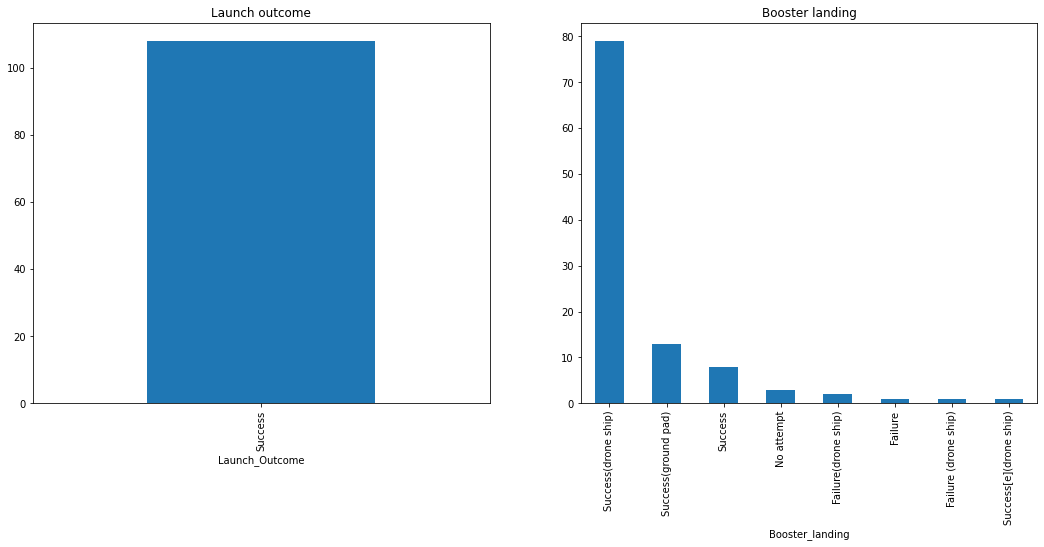

In [87]:
fig, axs = plt.subplots(ncols=2, figsize=(18,7))
df_f9b5['Booster_landing'].value_counts().plot(kind="bar", ax=axs[1])
axs[1].set_title("Booster landing")
df_f9b5['Launch_Outcome'].value_counts().plot(kind="bar", ax=axs[0])
axs[0].set_title("Launch outcome")
plt.show()

In [88]:
df_f9b5['Orbit'].mode()

0    LEO
Name: Orbit, dtype: object

<Axes: xlabel='Orbit'>

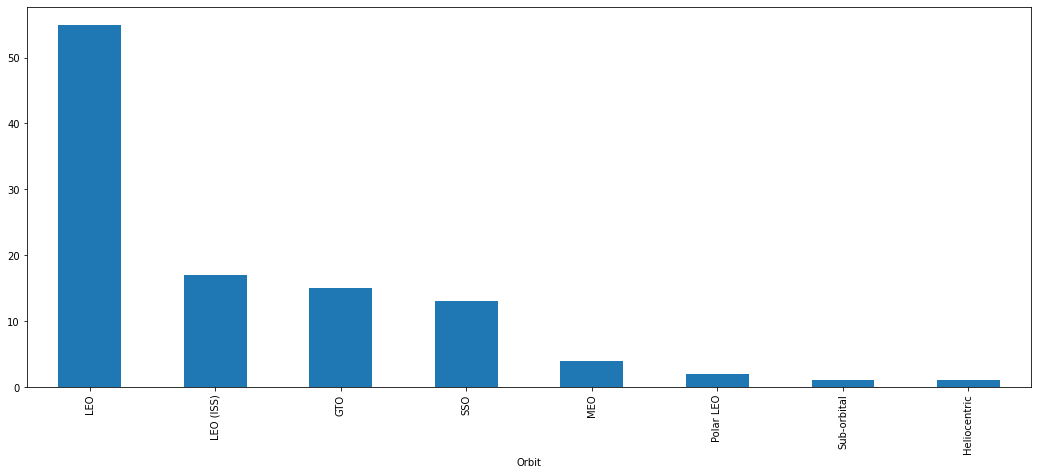

In [89]:
df_f9b5['Orbit'].value_counts().plot(kind="bar", figsize=(18,7))

In [90]:
df_f9b5['Customer'].mode()

0    SpaceX
Name: Customer, dtype: object

<Axes: xlabel='Customer'>

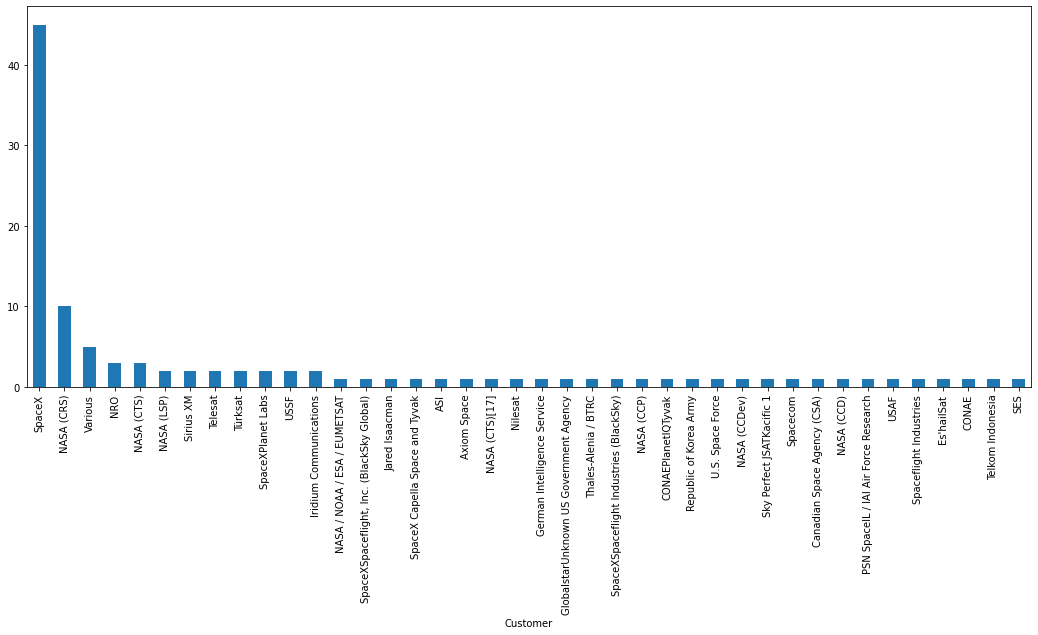

In [91]:
df_f9b5['Customer'].value_counts().plot(kind="bar", figsize=(18,7))

<Axes: ylabel='Date'>

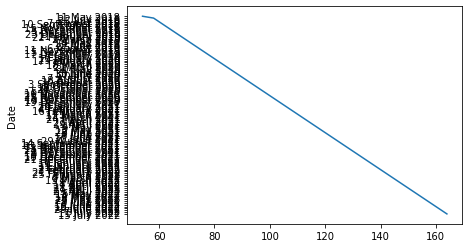

In [117]:
sns.lineplot(df_f9b5.Date)

In [97]:
df_f9b5['Launch_Site'].unique()

array(['KSC LC-39A', 'CCAFS SLC-40', 'VAFB SLC-4E', 'CCAF LC-40',
       'CCSFS SLC-40', 'VSFB SLC-4E', 'VSFBSLC-4E'], dtype=object)

/var/folders/z6/z8y0rh8s0tg3r1bbj96c2cvh0000gn/T/ipykernel_3969/2606258591.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(y=df_f9b5.Launch_Site, x=df_f9b5.Booster_landing, palette="magma")


<Axes: xlabel='Booster_landing', ylabel='Launch_Site'>

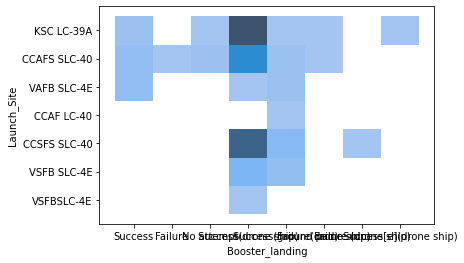

In [116]:
sns.histplot(y=df_f9b5.Launch_Site, x=df_f9b5.Booster_landing, palette="magma")


In [30]:
nasa_filter = df['Customer'].str.contains('NASA')
df_f9b5_nasa = df_f9b5[nasa_filter]
df_f9b5_nasa

/var/folders/z6/z8y0rh8s0tg3r1bbj96c2cvh0000gn/T/ipykernel_3969/2598075905.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_f9b5_nasa = df_f9b5[nasa_filter]


,Date,Time,"Version, Booster",Launch_Site,Payload,Payload_Mass,Orbit,Customer,Launch_Outcome,Booster_landing
65,5 December 2018,18:16,F9 B5 B1050,CCAFS SLC-40,SpaceX CRS-16,"2,500",LEO (ISS),NASA (CRS),Success,Failure
69,2 March 2019,07:49,F9 B5 B1051.1,KSC LC-39A,Crew Dragon Demo-1,"12,055",LEO (ISS),NASA (CCD),Success,Success(drone ship)
70,4 May 2019,06:48,F9 B5 B1056.1,CCAFS SLC-40,SpaceX CRS-17,"2,495",LEO (ISS),NASA (CRS),Success,Success(drone ship)
73,25 July 2019,22:01,F9 B5 B1056.2,CCAF LC-40,SpaceX CRS-18,"2,268",LEO (ISS),NASA (CRS),Success,Success(ground pad)
76,5 December 2019,17:29,F9 B5 B1059.1,CCAFS SLC-40,SpaceX CRS-19,"2,617",LEO (ISS),NASA (CRS),Success,Success(drone ship)
79,19 January 2020,15:30,F9 B5 B1046.4,KSC LC-39A,Crew Dragon in-flight abort test,"12,050",Sub-orbital,NASA (CTS),Success,No attempt
82,7 March 2020,04:50,F9 B5 B1059.2,CCAFS SLC-40,SpaceX CRS-20,"1,977",LEO (ISS),NASA (CRS),Success,Success(ground pad)
85,30 May 2020,19:22,F9 B5 B1058.1,KSC LC-39A,Crew Dragon Demo-2,"12,530",LEO (ISS),NASA (CCDev),Success,Success(drone ship)
98,16 November 2020,00:27,F9 B5 B1061.1,KSC LC-39A,Crew-1,"12,500",LEO (ISS),NASA (CCP),Success,Success(drone ship)
99,21 November 2020,17:17:08,F9 B5 B1063.1,VAFB SLC-4E,Sentinel-6 Michael Freilich,"1,192",LEO,NASA / NOAA / ESA / EUMETSAT,Success,Success(ground pad)


In [68]:
#df_f9b5_nasa['Booster_landing'].value_counts().plot(kind="bar")
#df_f9b5_nasa['Launch_Outcome'].value_counts().plot(kind="bar")

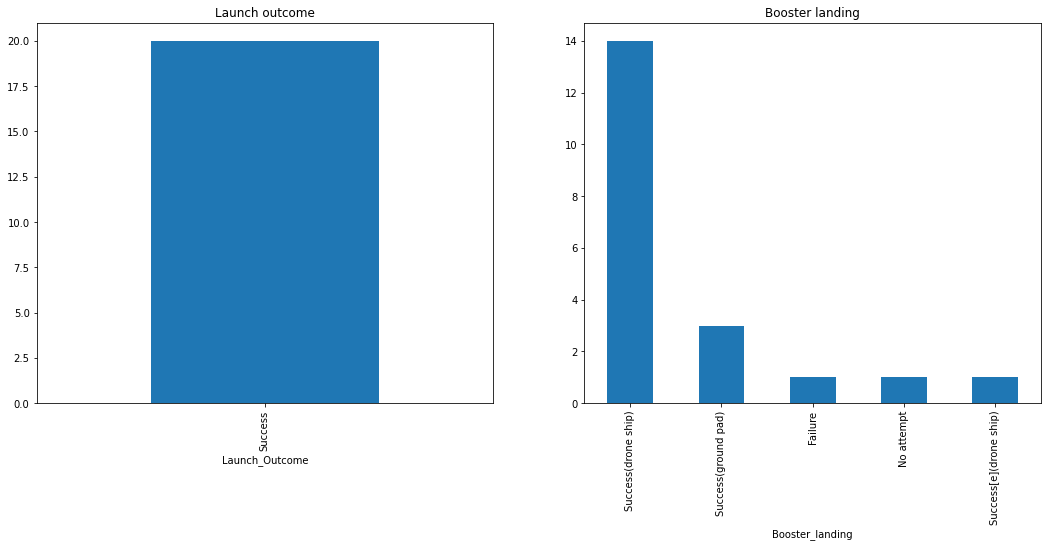

In [75]:
fig, axs = plt.subplots(ncols=2, figsize=(18,7))
df_f9b5_nasa['Booster_landing'].value_counts().plot(kind="bar", ax=axs[1])
axs[1].set_title("Booster landing")
df_f9b5_nasa['Launch_Outcome'].value_counts().plot(kind="bar", ax=axs[0])
axs[0].set_title("Launch outcome")

plt.show()